# Part 1: Text Processing and Exploratory Data Analysis

Author/s: <font color="blue">Jhonatan Barcos Gambaro | Daniel Alexander Yearwood</font>

E-mail: <font color="blue">jhonatan.barcos01@estudiant.upf.edu | danielalexander.yearwood01@estudiant.upf.edu </font>

Date: <font color="blue">24/10/2025</font>

In [25]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from collections import Counter


In [ ]:
# Download nltk resources
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\daniy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [26]:
# Upload dataset
data_path = '../../data/fashion_products_dataset.json'
products = pd.read_json(data_path)

# Display head of the dataset
display(products.head(5))

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Women Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


## 1.1. Pre-Processing text

Pre-process of the documents. In particular, for the text fields (title,
description)

In [27]:
# Define clean_text function to preprocess documents:
# 1. Removing stop words with nltk
# 2. Tokenization with nltk
# 3. Removing punctuation marks
# 4. Stemming with nltk's PorterStemmer
stop_words = set(stopwords.words("english"))
stemmer = nltk.PorterStemmer()

def clean_text(text):
    word_tokens = word_tokenize(text.lower())
    textos_limpios = ' '.join([word for word in word_tokens if word not in stop_words and word.isalnum()])
    textos_limpios = ' '.join([stemmer.stem(word) for word in word_tokenize(textos_limpios)])
    return textos_limpios

In [28]:
def clean_text_without_stemming(text):
    word_tokens = word_tokenize(text.lower())
    clean_text = ' '.join([word for word in word_tokens if word not in stop_words and word.isalnum()])
    return clean_text

In [ ]:
# Apply clean_text function to the columns 'title' and 'description' of the products dataset
products_cleaned = products.copy()
products_cleaned['title'] = products_cleaned['title'].apply(clean_text)
products_cleaned['description'] = products_cleaned['description'].apply(clean_text)

In [ ]:
# Print title, cleaned_title, description, cleaned_description of the first 2 products
for i in range(2):
    print("Title:", products['title'].iloc[i])
    print("Cleaned Title:", products_cleaned['title'].iloc[i])
    print("Description:", products['description'].iloc[i])
    print("Cleaned Description:", products_cleaned['description'].iloc[i], "\n")

Title: Solid Women Multicolor Track Pants
Cleaned Title: solid women multicolor track pant
Description: Yorker trackpants made from 100% rich combed cotton giving it a rich look.Designed for Comfort,Skin friendly fabric,itch-free waistband & great for all year round use Proudly made in India
Cleaned Description: yorker trackpant made 100 rich comb cotton give rich comfort skin friendli fabric waistband great year round use proudli made india 

Title: Solid Men Blue Track Pants
Cleaned Title: solid men blue track pant
Description: Yorker trackpants made from 100% rich combed cotton giving it a rich look.Designed for Comfort,Skin friendly fabric,itch-free waistband & great for all year round use Proudly made in India
Cleaned Description: yorker trackpant made 100 rich comb cotton give rich comfort skin friendli fabric waistband great year round use proudli made india 



## 1.2. Handle of category, sub_category, brand, product_details, and seller during pre-processing. 


In [33]:
# First we'll analyze the columns category, sub_category, brand, product_details, and seller to decide how to handle them during pre-processing
columns_to_analyze = ['category', 'sub_category', 'brand', 'product_details', 'seller']
columns_to_analyze_reduced = ['category', 'sub_category', 'brand', 'seller'] # Remove product_details due to is a list

# Display first 3 products of the columns to analyze
print("Displaying first 3 products of the columns to analyze:")
display(products[columns_to_analyze].head(3))

# Analyze the unique values in each column to analyze
print("\nDisplaying unique values in each column to analyze:")
display(products[columns_to_analyze_reduced].nunique())

# Analyze the values of product_details list of the first 10 products
print("\nDisplaying values in product_details for the first 10 products:\n")
for i in range(10):
    print("Product", i+1, "product_details:", products['product_details'].iloc[i])

Displaying first 3 products of the columns to analyze:


,category,sub_category,brand,product_details,seller
0,Clothing and Accessories,Bottomwear,York,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises
1,Clothing and Accessories,Bottomwear,York,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises
2,Clothing and Accessories,Bottomwear,York,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises



Displaying unique values in each column to analyze:


category          4
sub_category     24
brand           325
seller          535
dtype: int64


Displaying values in product_details for the first 10 products:

Product 1 product_details: [{'Style Code': '1005COMBO2'}, {'Closure': 'Elastic'}, {'Pockets': 'Side Pockets'}, {'Fabric': 'Cotton Blend'}, {'Pattern': 'Solid'}, {'Color': 'Multicolor'}]
Product 2 product_details: [{'Style Code': '1005BLUE'}, {'Closure': 'Drawstring, Elastic'}, {'Pockets': 'Side Pockets'}, {'Fabric': 'Cotton Blend'}, {'Pattern': 'Solid'}, {'Color': 'Blue'}]
Product 3 product_details: [{'Style Code': '1005COMBO4'}, {'Closure': 'Elastic'}, {'Pockets': 'Side Pockets'}, {'Fabric': 'Cotton Blend'}, {'Pattern': 'Solid'}, {'Color': 'Multicolor'}]
Product 4 product_details: [{'Style Code': '1005COMBO3'}, {'Closure': 'Elastic'}, {'Pockets': 'Side Pockets'}, {'Fabric': 'Cotton Blend'}, {'Pattern': 'Solid'}, {'Color': 'Multicolor'}]
Product 5 product_details: [{'Style Code': '1005COMBO1'}, {'Closure': 'Drawstring, Elastic'}, {'Pockets': 'Side Pockets'}, {'Fabric': 'Cotton Blend'}, {'Pattern': 'Solid'}, {'Color': 'Br

One we analyze the columns to pre-process, to take the best decision we'll study the validation_labels.csv, which will play a pivotal role in the project’s
second phase.

```python
For your reference: 
query_1: women full sleeve sweatshirt cotton,
query_2: men slim jeans blue


In [ ]:
explanation = """
Recommendation — hybrid approach
- Index category, sub_category, brand and seller as separate fields (fielded index / facets).
- Parse product_details (list of dicts) into structured attribute fields (e.g. color, fabric, pattern) and also produce a flattened details_text.
- Additionally create a merged `all_text` field (title + description + flattened product_details + brand) for full‑text retrieval and ranking.

Justification
- Distinctiveness: category/sub_category give coarse topical signals; brand and seller are metadata/facets that strongly affect filtering and precision; product_details contain fine-grained attributes (color, fabric, fit) that are crucial for exact-match and attribute queries.
- Retrieval effectiveness improves when you can both do free-text matching (high recall) on an aggregated field and apply fielded boosting/filters (high precision) on structured fields.

Pros & cons
- Merged single field only
    - Pros: simpler index; higher recall for free-text queries.
    - Cons: loses attribute semantics (cannot boost by brand or filter by color easily); ranking cannot exploit field importance.
- Separate fields only
    - Pros: precise filtering, faceted navigation, field-specific boosting, better precision.
    - Cons: may reduce recall for queries where words appear across different fields; more index complexity.
- Hybrid (recommended)
    - Pros: best of both — use `all_text` for recall and phrase matching, use structured fields and facets for precision and business rules (boost brand, filter by category, exact match on attributes).
    - Cons: larger index size, slightly more complex ingestion (parse product_details), need to tune field weights and analyzers.

Implementation notes
- Normalize values: lowercase, canonicalize brand/seller names, map synonyms (e.g., "tee" → "t-shirt").
- product_details: extract key/value pairs; index keys as fields and also index "key:value" tokens (e.g., `color_blue`) to preserve semantics and support exact attribute queries.
- Field analyzers: use keyword (non-tokenized) for brand and category IDs, use text analyzer (with stemming/stopword removal) for title/description/details_text.
- Use field boosting at query time (e.g., title>brand>details>all_text) and provide faceted filters on category/sub_category/brand/seller/attributes.

Short summary
- Parse product_details into structured attributes, keep category/sub_category/brand/seller as separate, and also maintain a merged `all_text` for full-text ranking. Tune analyzers and field weights for best balance of recall and precision.
"""

display(Markdown(explanation))

**Should they be merged into a single text field, indexed as separate fields in the inverted index or any other alternative?**

**Decision:**  
We apply a **hybrid approach** to handle these fields.  
Each field is **indexed separately** to preserve its distinct meaning, and a combined **`all_text` field** is created (including title, description, brand, category, sub_category, seller, and product_details) for full-text retrieval and ranking.

**Justify your choice, considering how their distinctiveness may affect retrieval effectiveness.**

**Justification:**  
These fields provide different types of information.  
For example, `title` and `description` describe the product in natural language and should be processed as normal text.  
On the other hand, `brand`, `category`, and `seller` represent structured metadata that identify key characteristics of a product.  
`product_details` adds specific attributes like color or fabric, which can also be flattened into text to support attribute-based queries.

If we merged all of them into a single text field, we would lose the semantic distinction between textual content and metadata, which could reduce precision.  
Keeping them completely separate, however, could lower recall, since relevant terms might appear across multiple fields.  
By combining both ideas—maintaining individual fields and also building an aggregated one—we balance **precision** and **recall** (through the combined text representation).


**What are pros and cons of each approach?**

| Approach | Description | Pros | Cons |
|-----------|--------------|------|------|
| **Single merged field** | All fields concatenated into one text | Simple implementation; high recall | Loses field meaning; cannot boost or filter by specific attributes |
| **Separate fields only** | Each field indexed independently | Enables accurate filtering and field weighting | Lower recall if query terms are distributed across fields |
| **Hybrid (recommended)** | Index fields separately and also create a merged `all_text` field | Balances recall and precision; supports both text search and structured filters | Slightly more complex indexing and larger index size |


In [34]:
# Hybrid approach implementation (fixed flattening for product_details structured as list of single-key dicts)

# Define auxiliar functions 
# 1. preprocess_full_text: to preprocess text for full-text field (All Text)
def preprocess_full_text(text):
    if not isinstance(text, str):
        return [] 
    
    word_tokens = nltk.word_tokenize(text.lower())
    
    tokens_nets = [
        stemmer.stem(word) 
        for word in word_tokens 
        if word not in stop_words and word.isalnum() 
    ]
    
    return tokens_nets

# 2. preprocess_keyword: to preprocess text for keyword fields (Fielded Index)
def preprocess_keyword(text):
    if not isinstance(text, str):
        return None
    
    text = text.lower().strip()
    if not text:
        return None
        
    text = re.sub(r'\s+', '_', text) 
    text_net = ''.join(char for char in text if char.isalnum() or char == '_')

    return text_net

# 3. process_product_details: to process product_details list of dicts into text for All Text and keyword fields for Fielded Index
def process_product_details(details_list):
    text_for_all_text_list = []
    keyword_fields_dict = {}
    if not isinstance(details_list, list):
        return '', keyword_fields_dict
    for item_dict in details_list:
        if isinstance(item_dict, dict):
            for key, value in item_dict.items():
                if isinstance(value, str):
                    # 1. Recall fields per al Canal 1 (All Text)
                    text_for_all_text_list.append(key)
                    text_for_all_text_list.append(value)
                    
                    # 2. Precision fields per al Canal 2 (Fielded Index)
                    kw_key_name = f"detail_{preprocess_keyword(key)}"
                    kw_value = preprocess_keyword(value) 
                    if kw_key_name and kw_value:
                        keyword_fields_dict[kw_key_name] = kw_value
    
    return ' '.join(text_for_all_text_list), keyword_fields_dict

In [35]:
# Hybrid architecture implementation
products_cleaned['brand_kw'] = products['brand'].apply(preprocess_keyword)
products_cleaned['category_kw'] = products['category'].apply(preprocess_keyword)
products_cleaned['sub_category_kw'] = products['sub_category'].apply(preprocess_keyword)
products_cleaned['seller_kw'] = products['seller'].apply(preprocess_keyword)

temp_df = products['product_details'].apply(lambda x: pd.Series(process_product_details(x)))
temp_df.columns = ['details_text_chunk', 'details_kw_dict']
details_kw_df = temp_df['details_kw_dict'].apply(pd.Series)
products_cleaned = pd.concat([products_cleaned, details_kw_df], axis=1)

# Apply preprocess_full_text to create 'all_text' field
title_cleaned_tokens = products['title'].apply(preprocess_full_text)
description_cleaned_tokens = products['description'].apply(preprocess_full_text)
brand_cleaned_tokens = products['brand'].apply(preprocess_full_text)
category_cleaned_tokens = products['category'].apply(preprocess_full_text)
sub_category_cleaned_tokens = products['sub_category'].apply(preprocess_full_text)
seller_cleaned_tokens = products['seller'].apply(preprocess_full_text)
details_cleaned_tokens = temp_df['details_text_chunk'].apply(preprocess_full_text)

# Combine all tokens into 'all_text' field
products_cleaned['all_text'] = (
    title_cleaned_tokens +
    description_cleaned_tokens +
    brand_cleaned_tokens +
    category_cleaned_tokens +
    sub_category_cleaned_tokens +
    seller_cleaned_tokens +
    details_cleaned_tokens
)

In [36]:
# Test final verification
print("\n--- Verificació del Resultat Final ---")
cols_to_show = ['pid', 'all_text', 'brand_kw', 'category_kw']
if 'detail_color' in products_cleaned.columns:
    cols_to_show.append('detail_color')
if 'detail_fabric' in products_cleaned.columns:
    cols_to_show.append('detail_fabric')

display(products_cleaned[cols_to_show].head())


--- Verificació del Resultat Final ---


,pid,all_text,brand_kw,category_kw,detail_color,detail_fabric
0,TKPFCZ9EA7H5FYZH,"[solid, women, multicolor, track, pant, yorker...",york,clothing_and_accessories,multicolor,cotton_blend
1,TKPFCZ9EJZV2UVRZ,"[solid, men, blue, track, pant, yorker, trackp...",york,clothing_and_accessories,blue,cotton_blend
2,TKPFCZ9EHFCY5Z4Y,"[solid, men, multicolor, track, pant, yorker, ...",york,clothing_and_accessories,multicolor,cotton_blend
3,TKPFCZ9ESZZ7YWEF,"[solid, women, multicolor, track, pant, yorker...",york,clothing_and_accessories,multicolor,cotton_blend
4,TKPFCZ9EVXKBSUD7,"[solid, women, brown, grey, track, pant, yorke...",york,clothing_and_accessories,brown_grey,cotton_blend


## 1.3 Handling of Numeric and Boolean Fields

**How should the fields `out_of_stock`, `selling_price`, `discount`, `actual_price`, and `average_rating` be handled during pre-processing? Should they be indexed as textual terms?**


These fields are **structured numeric or boolean attributes**, not natural language text.  
They should **not be indexed as textual terms**, since tokenizing numbers or boolean values would not provide meaningful information for retrieval.

Instead, they should be **converted and normalized** to numerical or boolean types for later use in ranking, sorting, or filtering:
- `out_of_stock` → boolean (`True`/`False`)  
- `selling_price`, `actual_price` → float values  
- `discount` → percentage value  
- `average_rating` → numeric rating (float)

This ensures the search engine can use these features to refine results (for example, filtering available items or boosting products with higher ratings) without polluting the text index.


In [37]:
products_cleaned = products_cleaned.copy()

# 1️Convert boolean
products_cleaned['out_of_stock'] = products_cleaned['out_of_stock'].astype(bool)

# Helper function to clean numeric fields
def clean_numeric(value):
    if isinstance(value, str):
        value = re.sub(r'[^\d.,]', '', value).replace(',', '')
    try:
        return float(value)
    except:
        return np.nan

# Apply cleaning to numeric columns
for col in ['selling_price', 'actual_price', 'discount', 'average_rating']:
    products_cleaned[col] = products_cleaned[col].apply(clean_numeric)

# Ensure discount is in valid range
products_cleaned['discount'] = products_cleaned['discount'].clip(0, 100)

#Display result to verify
products_cleaned[['pid', 'out_of_stock', 'selling_price', 'actual_price', 'discount', 'average_rating']].head()

,pid,out_of_stock,selling_price,actual_price,discount,average_rating
0,TKPFCZ9EA7H5FYZH,False,921.0,2999.0,69.0,3.9
1,TKPFCZ9EJZV2UVRZ,False,499.0,1499.0,66.0,3.9
2,TKPFCZ9EHFCY5Z4Y,False,931.0,2999.0,68.0,3.9
3,TKPFCZ9ESZZ7YWEF,False,911.0,2999.0,69.0,3.9
4,TKPFCZ9EVXKBSUD7,False,943.0,2999.0,68.0,3.9


# PART 2: Exploratory Data Analysis

### 2.1 Dataset overview

**What is the size of the dataset and are there missing values in key fields?**

We inspect the schema and null counts to assess data quality before plotting.



In [38]:
products_cleaned.info()
products_cleaned[[
    "pid","title","brand","category","sub_category","seller",
    "out_of_stock","selling_price","actual_price","discount","average_rating"
]].sample(5, random_state=42)

nulls = products_cleaned[[
    "brand","category","sub_category","seller",
    "out_of_stock","selling_price","actual_price","discount","average_rating"
]].isnull().sum().sort_values(ascending=False)
nulls


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Columns: 145 entries, _id to all_text
dtypes: bool(1), datetime64[ns](1), float64(4), object(139)
memory usage: 30.9+ MB


average_rating    2261
discount           855
actual_price       777
selling_price        2
brand                0
out_of_stock         0
seller               0
sub_category         0
category             0
dtype: int64

### 2.2 Text length and vocabulary size

**How long are titles/descriptions and what is the vocabulary size after preprocessing?**

We count tokens per field and estimate the global vocabulary (unique tokens) to understand textual richness.


In [ ]:
# Count tokens in title and cleaned description
def count_tokens(text):
    if isinstance(text, str):
        return len(text.split())
    return 0

products_cleaned["title_len"] = products_cleaned["title"].apply(count_tokens)
products_cleaned["desc_len"]  = products_cleaned["description"].apply(count_tokens)

# Show simple stats
products_cleaned[["title_len","desc_len"]].describe()


,title_len,desc_len
count,28080.000000,28080.000000
mean,5.757051,17.676389
std,1.854674,25.006123
min,1.000000,0.000000
25%,5.000000,0.000000
50%,5.000000,9.000000
75%,7.000000,27.000000
max,30.000000,472.000000


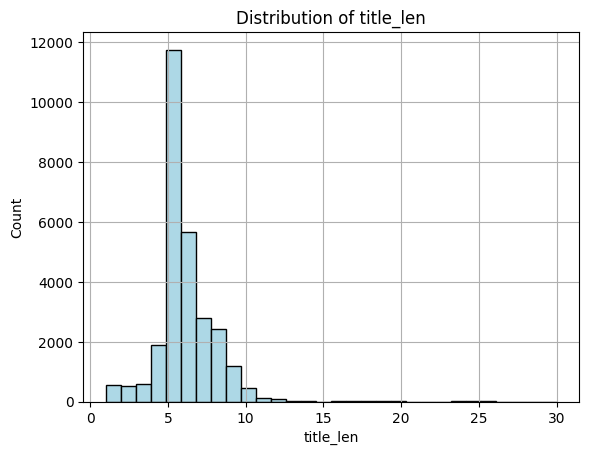

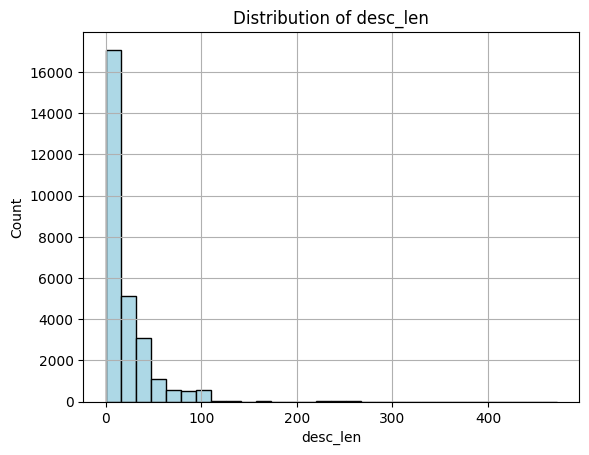

In [41]:
# Plot histograms for text lengths

for col in ["title_len","desc_len"]:
    plt.figure()
    products_cleaned[col].dropna().hist(bins=30, color="lightblue", edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [ ]:
# Vocabulary size and most frequent words (based on cleaned description)

all_words = " ".join(products_cleaned["description"].astype(str)).split()
vocab_counter = Counter(all_words)

print(f"Vocabulary size: {len(vocab_counter)}")
pd.Series(vocab_counter).sort_values(ascending=False).head(25)


Vocabulary size: 4555


cotton     9874
wear       9250
comfort    8652
shirt      7493
look       6171
casual     5867
fit        5595
made       5486
fabric     5406
print      4865
women      4395
design     4179
sleev      4007
qualiti    4002
men        3705
day        3463
wash       3293
style      3241
make       3233
100        3153
feel       3131
perfect    2953
neck       2848
great      2731
pair       2717
dtype: int64

### 2.3 Price, Discount, and Rating Analysis

**How are prices, discounts, and ratings distributed, and which products stand out by their values?**

We explore the numerical attributes (`selling_price`, `actual_price`, `discount`, `average_rating`) to understand their range, detect outliers, and identify top-rated or most discounted products.


In [ ]:
#Basic statistics for numerical columns
num_cols = ["selling_price", "actual_price", "discount", "average_rating"]
products_cleaned[num_cols].describe()


,selling_price,actual_price,discount,average_rating
count,28078.000000,27303.000000,27225.000000,25819.000000
mean,705.635088,1455.528110,50.256896,3.627724
std,549.681489,939.977456,16.887287,0.663429
min,99.000000,150.000000,1.000000,1.000000
25%,390.000000,849.000000,40.000000,3.200000
50%,545.000000,1199.000000,53.000000,3.800000
75%,820.000000,1799.000000,63.000000,4.100000
max,7999.000000,12999.000000,87.000000,5.000000


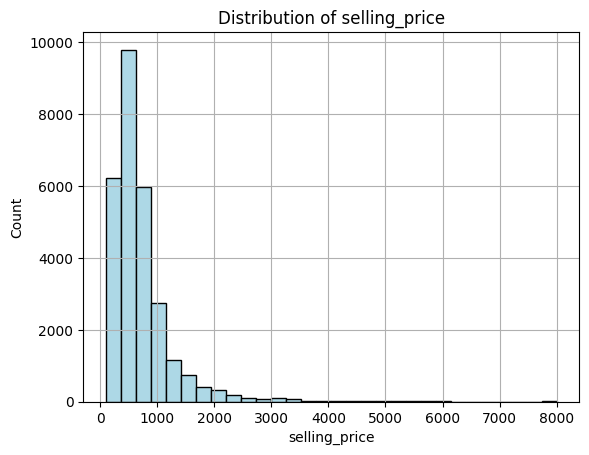

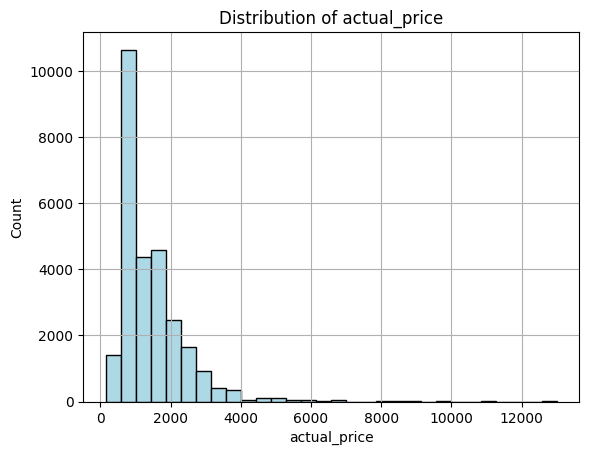

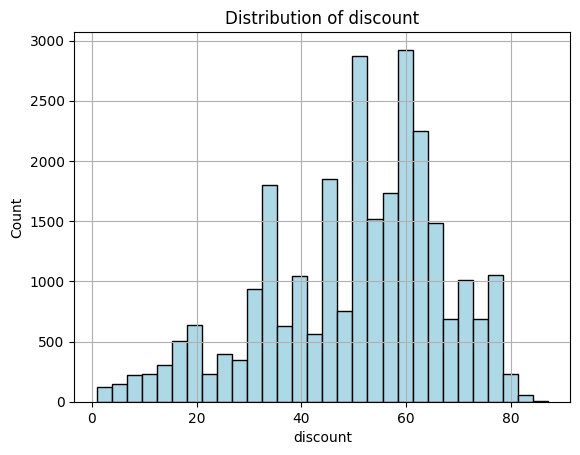

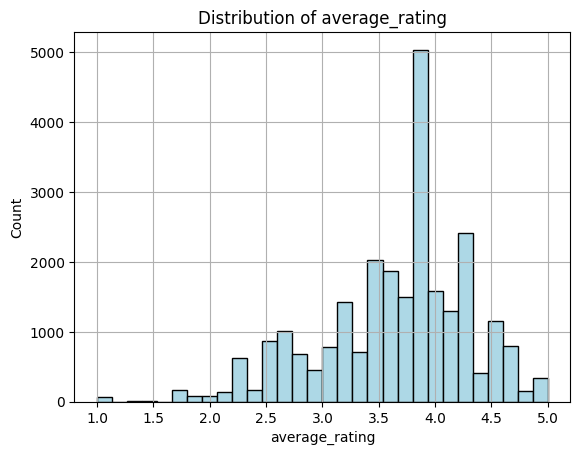

In [44]:
for col in num_cols:
    plt.figure()
    products_cleaned[col].dropna().hist(bins=30, color="lightblue", edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [47]:
# Top 5 most expensive products
print("Top 5 most expensive products:")
display(products_cleaned[["title", "selling_price", "brand"]]
        .sort_values("selling_price", ascending=False)
        .head(5))

# Top 5 biggest discounts
print("\nTop 5 biggest discounts:")
display(products_cleaned[["title", "discount", "brand"]]
        .sort_values("discount", ascending=False)
        .head(5))

# Top 5 highest rated products
print("\nTop 5 highest rated products:")
display(products_cleaned[["title", "average_rating", "brand"]]
        .sort_values("average_rating", ascending=False)
        .head(5))


Top 5 most expensive products:


,title,selling_price,brand
2067,solid women track suit,7999.0,REEB
11010,checker singl breast parti women full sleev bl...,7998.0,True Bl
25815,full sleev solid women casual jacket,7799.0,Pu
26089,full sleev print men sweatshirt,7799.0,Pu
6895,skinni men blue jean,7794.0,G



Top 5 biggest discounts:


,title,discount,brand
906,print women round neck white,87.0,Jack Roy
902,print women round neck grey,86.0,Jack Roy
903,print women round neck white,86.0,Jack Roy
18249,print men round neck multicolor pack 2,85.0,yellowvib
520,print women round crew black grey,84.0,Fairdea



Top 5 highest rated products:


,title,average_rating,brand
12339,graphic print women round neck white,5.0,ATTIITU
12334,print solid men round neck black,5.0,ATTIITU
12348,solid women round neck black grey,5.0,ATTIITU
27767,solid women round neck blue,5.0,Oka
19971,regular fit men grey satin blend trouser,5.0,Adam Park


**Observation**  
Prices are right-skewed (few very expensive items).  
Discounts usually fall between ~50–80%.  
Ratings cluster around 3–4 stars.  
These patterns will be useful for simple filters and ranking tweaks later.


### 2.4 Top categories, brands, and sellers

**Which categories, sub_categories, brands, and sellers are most frequent?**

We count how many products belong to each category/brand/seller to understand the dataset composition and potential biases.



Top 10 category:


category
Clothing and Accessories    27118
Footwear                      920
Bags, Wallets & Belts          41
Toys                            1
Name: count, dtype: int64


Top 10 sub_category:


sub_category
Topwear                            15310
Bottomwear                          3666
Winter Wear                         2493
Innerwear and Swimwear              1762
Clothing Accessories                1742
Kurtas, Ethnic Sets and Bottoms     1180
Men's Footwear                       920
Fabrics                              534
Sleepwear                            122
Blazers, Waistcoats and Suits        103
Name: count, dtype: int64


Top 15 brand:


brand
                2009
ECKO Unl         951
Free Authori     860
ARBO             806
REEB             802
Pu               798
True Bl          793
Keo              660
Amp              585
Black Beat       548
vims rai         503
yellowvib        492
PixF             429
Oka              414
Gracew           405
Name: count, dtype: int64


Top 15 seller:


seller
                         1643
RetailNet                1411
SandSMarketing            887
BioworldMerchandising     842
ARBOR                     783
Keoti                     660
AFFGARMENTS               587
Black Beatle              548
AMALGUS ENTERPRISE        477
Tayab Manch Fashions      436
KAPSONSRETAILPVTLTD       415
GRACEWAY                  408
T-SHIRT EXPRESS           393
OKANE                     386
WHITE SKY                 371
Name: count, dtype: int64

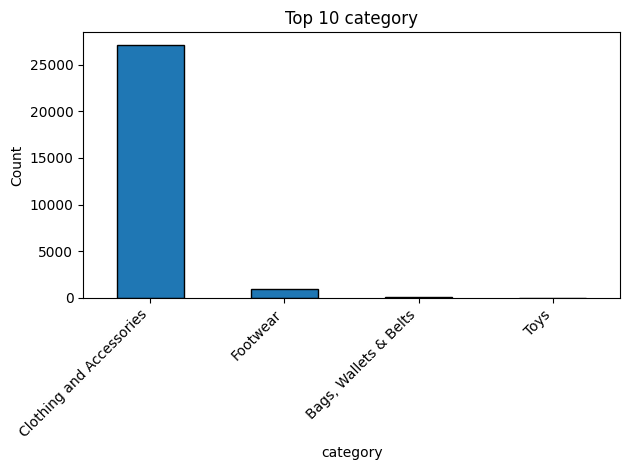

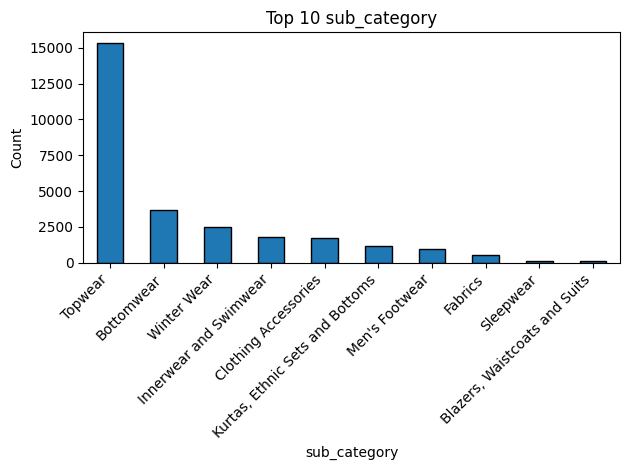

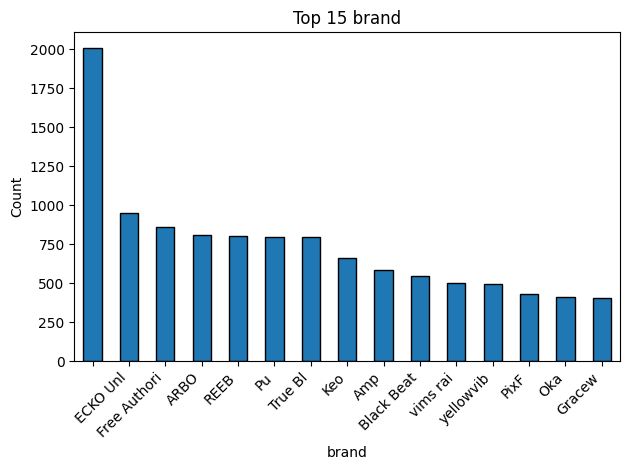

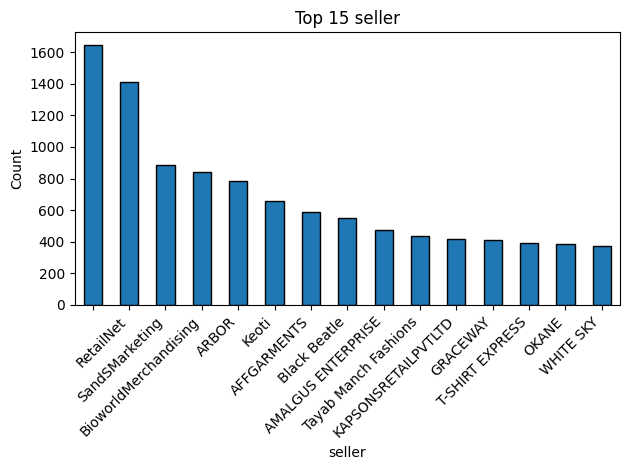

In [50]:
# Simple frequency tables (Top-N)
top_cfg = {
    "category": 10,
    "sub_category": 10,
    "brand": 15,
    "seller": 15
}

for col, k in top_cfg.items():
    print(f"\nTop {k} {col}:")
    counts = products_cleaned[col].value_counts().head(k)
    display(counts)

for col, k in top_cfg.items():
    counts = products_cleaned[col].value_counts().head(k)
    plt.figure()
    counts.plot(kind="bar", edgecolor="black")
    plt.title(f"Top {k} {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()